# Demo for DoWhy Causal Prediction on MNIST

The goal of this notebook is to demonstrate the implementation of *Causally Adaptive Constraint Minimization (CACM)* on single- and multi-attribute shift MNIST datasets -- `MNIST_Causal_Attribute`, `MNIST_Ind_Attribute`, `MNIST_Causal_Ind_Attribute`. Dataset details can be found in `dowhy.causal_prediction.datasets`.

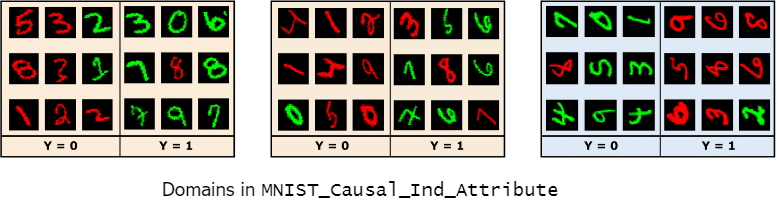

In [1]:
import torch
import pytorch_lightning as pl

/anaconda/envs/dowhy_try/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialize dataset

In [2]:
from dowhy.causal_prediction.datasets.mnist import MNIST_Causal_Attribute

# dataset class initialization requires mandatory param `data_dir`
# torchvision.datasets.MNIST with param download=True downloads data if not present 
data_dir = 'data'
dataset = MNIST_Causal_Attribute(data_dir)

## Initialize data loaders

In [3]:
from dowhy.causal_prediction.dataloaders.get_data_loader import get_loaders

In [4]:
# loaders is a dictionary of 'train_loaders', 'val_loaders', 'train_loaders'
# single (n=1) validation and test environments supported currently
loaders = get_loaders(dataset, train_envs=[0, 1], batch_size=64,
            val_envs=[2], test_envs=[3])

### Aliter: Validation set using subset of training data

In [9]:
# val_envs, test_envs are optional parameters
# If val_envs not provided, subset of training data (holdout_fraction) is used for creating val set

loaders = get_loaders(dataset, train_envs=[0, 1], batch_size=64,
            holdout_fraction=0.2, test_envs=[3])

## Initialize model and algorithm class

In [5]:
from dowhy.causal_prediction.models.networks import MNIST_MLP, Classifier

In [6]:
# `model` is expected to be of type torch.nn.Sequential with two torch.nn.Module elements (feature extractor and classifier)
# we provide sample networks (MLP, ResNet) in `dowhy.causal_prediction.models.networks` but the user can flexibly use any models
featurizer = MNIST_MLP(dataset.input_shape)
classifier = Classifier(
    featurizer.n_outputs,
    dataset.num_classes)

model = torch.nn.Sequential(featurizer, classifier)

In [7]:
from dowhy.causal_prediction.algorithms.cacm import CACM

In [8]:
# initialize CACM algorithm class
# `attr_types` list contains type of attributes present (supports 'causal' and 'ind' currently)
algorithm = CACM(model, lr=1e-3, gamma=1e-2, attr_types=['causal'], lambda_causal=100.)

## Fit predictor and start training

In [9]:
trainer = pl.Trainer(gpus=1, max_epochs=5) 

# val_loaders is optional param
trainer.fit(algorithm, loaders['train_loaders'], loaders['val_loaders'])

/anaconda/envs/dowhy_try/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 306 K 
-------------------------------------
306 K     Trainable params
0         Non-trainable params
306 K     Total params
1.226     Total estimated model params size (MB)


Epoch 0:  71%|████████████████████████████████████▎              | 390/547 [00:09<00:03, 40.13it/s, loss=0.683, v_num=8]
Validation: 0it [00:00, ?it/s]
Epoch 0:  83%|██████████████████████████████████████████▏        | 452/547 [00:10<00:02, 45.08it/s, loss=0.683, v_num=8]


Epoch 0:  95%|████████████████████████████████████████████████▎  | 518/547 [00:10<00:00, 50.03it/s, loss=0.683, v_num=8]


Epoch 0: 100%|████████████████████| 547/547 [00:10<00:00, 52.07it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682]
Epoch 1:  71%|▋| 390/547 [00:09<00:03, 40.33it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|                                                                  | 0/157 [00:00<?, ?it/s]
Epoch 1:  71%|▋| 391/547 [00:09<00:03, 40.38it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  72%|▋| 392/547 [00:09<00:03, 40.47it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  72%|▋| 393/547 [00:09<00:03, 40.55it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  72%|▋| 394/547 [00:09<00:03, 40.63it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  72%|▋| 395/547 [00:09<00:03, 40.71it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
E

Epoch 1:  78%|▊| 424/547 [00:09<00:02, 43.07it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  78%|▊| 425/547 [00:09<00:02, 43.15it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  78%|▊| 426/547 [00:09<00:02, 43.22it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  78%|▊| 427/547 [00:09<00:02, 43.30it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  78%|▊| 428/547 [00:09<00:02, 43.38it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  78%|▊| 429/547 [00:09<00:02, 43.46it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  79%|▊| 430/547 [00:09<00:02, 43.54it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  79%|▊| 431/547 [00:09<00:02, 43.62it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  79%|▊| 432/547 [00:09<

Epoch 1:  90%|▉| 490/547 [00:10<00:01, 48.16it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  90%|▉| 491/547 [00:10<00:01, 48.23it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  90%|▉| 492/547 [00:10<00:01, 48.31it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  90%|▉| 493/547 [00:10<00:01, 48.39it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  90%|▉| 494/547 [00:10<00:01, 48.46it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  90%|▉| 495/547 [00:10<00:01, 48.53it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  91%|▉| 496/547 [00:10<00:01, 48.61it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  91%|▉| 497/547 [00:10<00:01, 48.68it/s, loss=0.683, v_num=8, val_acc=0.645, val_loss=0.682, penalty_causal=0.0
Epoch 1:  91%|▉| 498/547 [00:10<

Epoch 2:  72%|▋| 395/547 [00:09<00:03, 40.62it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  72%|▋| 396/547 [00:09<00:03, 40.69it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 397/547 [00:09<00:03, 40.78it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 398/547 [00:09<00:03, 40.86it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 399/547 [00:09<00:03, 40.94it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 400/547 [00:09<00:03, 41.02it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 401/547 [00:09<00:03, 41.10it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  73%|▋| 402/547 [00:09<00:03, 41.18it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  74%|▋| 403/547 [00:09<

Epoch 2:  84%|▊| 461/547 [00:10<00:01, 45.88it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  84%|▊| 462/547 [00:10<00:01, 45.96it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  85%|▊| 463/547 [00:10<00:01, 46.04it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  85%|▊| 464/547 [00:10<00:01, 46.11it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  85%|▊| 465/547 [00:10<00:01, 46.19it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  85%|▊| 466/547 [00:10<00:01, 46.27it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  85%|▊| 467/547 [00:10<00:01, 46.34it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  86%|▊| 468/547 [00:10<00:01, 46.42it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  86%|▊| 469/547 [00:10<

Epoch 2:  96%|▉| 527/547 [00:10<00:00, 50.81it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 528/547 [00:10<00:00, 50.88it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 529/547 [00:10<00:00, 50.95it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 530/547 [00:10<00:00, 51.02it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 531/547 [00:10<00:00, 51.09it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 532/547 [00:10<00:00, 51.17it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  97%|▉| 533/547 [00:10<00:00, 51.24it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  98%|▉| 534/547 [00:10<00:00, 51.31it/s, loss=0.687, v_num=8, val_acc=0.604, val_loss=0.688, penalty_causal=0.0
Epoch 2:  98%|▉| 535/547 [00:10<

Epoch 3:  79%|▊| 432/547 [00:09<00:02, 44.04it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  79%|▊| 433/547 [00:09<00:02, 44.12it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  79%|▊| 434/547 [00:09<00:02, 44.20it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 435/547 [00:09<00:02, 44.28it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 436/547 [00:09<00:02, 44.36it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 437/547 [00:09<00:02, 44.44it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 438/547 [00:09<00:02, 44.52it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 439/547 [00:09<00:02, 44.60it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  80%|▊| 440/547 [00:09<

Epoch 3:  91%|▉| 498/547 [00:10<00:00, 49.14it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  91%|▉| 499/547 [00:10<00:00, 49.21it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  91%|▉| 500/547 [00:10<00:00, 49.29it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  92%|▉| 501/547 [00:10<00:00, 49.36it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  92%|▉| 502/547 [00:10<00:00, 49.44it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  92%|▉| 503/547 [00:10<00:00, 49.51it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  92%|▉| 504/547 [00:10<00:00, 49.59it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  92%|▉| 505/547 [00:10<00:00, 49.66it/s, loss=0.678, v_num=8, val_acc=0.504, val_loss=0.689, penalty_causal=0.0
Epoch 3:  93%|▉| 506/547 [00:10<

Epoch 4:  74%|▋| 403/547 [00:09<00:03, 41.77it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  74%|▋| 404/547 [00:09<00:03, 41.85it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  74%|▋| 405/547 [00:09<00:03, 41.93it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  74%|▋| 406/547 [00:09<00:03, 42.02it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  74%|▋| 407/547 [00:09<00:03, 42.10it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  75%|▋| 408/547 [00:09<00:03, 42.18it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  75%|▋| 409/547 [00:09<00:03, 42.26it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  75%|▋| 410/547 [00:09<00:03, 42.34it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  75%|▊| 411/547 [00:09<

Epoch 4:  86%|▊| 469/547 [00:09<00:01, 47.07it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  86%|▊| 470/547 [00:09<00:01, 47.15it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  86%|▊| 471/547 [00:09<00:01, 47.22it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  86%|▊| 472/547 [00:09<00:01, 47.30it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  86%|▊| 473/547 [00:09<00:01, 47.38it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  87%|▊| 474/547 [00:09<00:01, 47.46it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  87%|▊| 475/547 [00:09<00:01, 47.54it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  87%|▊| 476/547 [00:09<00:01, 47.61it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  87%|▊| 477/547 [00:10<

Epoch 4:  98%|▉| 535/547 [00:10<00:00, 52.09it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  98%|▉| 536/547 [00:10<00:00, 52.16it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  98%|▉| 537/547 [00:10<00:00, 52.24it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  98%|▉| 538/547 [00:10<00:00, 52.31it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  99%|▉| 539/547 [00:10<00:00, 52.38it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  99%|▉| 540/547 [00:10<00:00, 52.46it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  99%|▉| 541/547 [00:10<00:00, 52.53it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  99%|▉| 542/547 [00:10<00:00, 52.60it/s, loss=0.687, v_num=8, val_acc=0.681, val_loss=0.682, penalty_causal=0.0
Epoch 4:  99%|▉| 543/547 [00:10<

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█| 547/547 [00:10<00:00, 52.89it/s, loss=0.687, v_num=8, val_acc=0.697, val_loss=0.684, penalty_causal=0.0


## Evaluate on test domain

In [10]:
trainer.test(dataloaders=loaders['test_loaders'])

/anaconda/envs/dowhy_try/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1386: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at /home/t-kaurjivat/dowhy/docs/source/example_notebooks/lightning_logs/version_8/checkpoints/epoch=4-step=1950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from checkpoint at /home/t-kaurjivat/dowhy/docs/source/example_notebooks/lightning_logs/version_8/checkpoints/epoch=4-step=1950.ckpt


Testing DataLoader 0: 100%|██████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 293.94it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.6953999996185303
        test_loss           0.6839932203292847
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.6953999996185303, 'test_loss': 0.6839932203292847}]

## Trying different datasets and algorithms

### MNIST Independent and Causal+Independent datasets

New datasets can be added to `dowhy.causal_prediction.datasets` and imported here. Additional `attr_types` should be provided to CACM algorithm for handling multiple shifts.

In [17]:
from dowhy.causal_prediction.datasets.mnist import MNIST_Causal_Ind_Attribute

data_dir = 'data'
dataset = MNIST_Causal_Ind_Attribute(data_dir)

In [21]:
algorithm = CACM(model, lr=1e-3, gamma=1e-2, attr_types=['ind', 'causal'], lambda_causal=100., lambda_ind=10.)

### ERM algorithm
We have implemented ERM in `dowhy.causal_prediction.algorithms` as a baseline. Additional algorithms can be added by extending the `training_step` function in base class.

In [20]:
from dowhy.causal_prediction.algorithms.erm import ERM
algorithm = ERM(model, lr=1e-3)